In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import pingouin as pg
import plotly.express as px
import seaborn as sns 
from statannot import add_stat_annotation
import os
import copy
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [202]:
def read_data(path):
    data_raw = []
    data_auto = []
    data_control = []
    data_self = []
    for home, dirs, files in os.walk(path):
        for filename in files:
            t = pd.read_csv(home+"/"+filename,index_col=0)
            t = t[90:-1].reset_index()
            t[["participant_id"]] = filename[1:3]
            t[["condition"]] = filename[4:8]
            t[["missionTargetName"]] = t[["missionTargetName"]].replace(['MissionPanel'],np.nan)
            if filename[4:8] == "auto":
                data_auto.append(t)
            elif filename[4:8] == "cont":
                data_control.append(t)
            elif filename[4:8] == "self":
                data_self.append(t)
            data_raw.append(t)
            # print(filename[1:3] + "_" + filename[4:8])
    return data_raw, data_auto, data_control, data_self

In [157]:
## Test the normality of the data
def test_normality(data_raw):
    normal_condition = []
    for i in range(len(data_raw)):
        normal_condition.append(pg.normality(data_raw[i]['Trend_Sum']))
    return normal_condition



In [173]:
## Calculate the time of each mission ##
def total_data_analysis(data_raw):
    data_analysis = pd.DataFrame()
    for i in range(len(data_raw)):      
        mission_time = np.zeros(4)
        time_all = len(data_raw[i])/90
        condition = data_raw[i][["condition"]][0:1].values.ravel()[0]
        participant_id = data_raw[i][["participant_id"]][0:1].values.ravel()[0]

        # print(participant_id + condition)

        time_point = data_raw[i][["missionTargetName"]].duplicated()
        order = time_point[time_point == False]
        for j in range(len(order)-1):
            mission_time[j] = ((order.index[j+1] - order.index[j])/90)        
        
        mission_completed = len(order)-1
        time_1 = mission_time[0]
        time_2 = mission_time[1]
        time_3 = mission_time[2]
        time_4 = mission_time[3]
        
        cogload_average = (np.average(data_raw[i]["Trend_Sum"]))
        damage_find = len(data_raw[i].damageTargetName.unique()) - 1

        data_analysis = data_analysis.append(pd.DataFrame([[condition,participant_id,mission_completed,time_all,time_1,time_2,time_3,time_4,cogload_average,damage_find]],
                                                columns=["condition","participant_id","mission_completed","time_all","time_1","time_2","time_3","time_4","cogload_average","damage_find"]),
                                                ignore_index=True)
    
    return data_analysis

In [203]:
path = '../../data/test/'
(data_raw, data_auto, data_control, data_self) = read_data(path)
data_analysis = total_data_analysis(data_raw)



C:\Users\Du-Lab\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning:

Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
test_normality(data_raw)

In [209]:
### test ###
data_analysis

,condition,participant_id,mission_completed,time_all,time_1,time_2,time_3,time_4,cogload_average,damage_find
0,auto,01,4,350.477778,90.533333,63.933333,45.655556,150.322222,0.468730,2
1,cont,01,3,387.511111,99.744444,55.288889,52.444444,0.000000,0.327164,3
2,self,01,2,511.477778,58.077778,273.355556,0.000000,0.000000,0.557953,2
3,auto,02,3,392.500000,74.388889,219.844444,98.244444,0.000000,0.922625,3
4,cont,02,4,263.444444,53.244444,55.811111,30.122222,124.233333,0.974022,3
5,self,02,4,257.333333,45.922222,73.677778,25.122222,112.577778,1.050457,3
6,auto,03,4,277.233333,32.122222,114.666667,37.344444,93.066667,0.494752,3
7,cont,03,4,273.422222,40.000000,93.811111,25.222222,114.366667,0.612531,4
8,self,03,3,465.466667,45.866667,92.111111,327.455556,0.000000,1.005163,3
9,auto,04,3,406.500000,45.977778,294.177778,66.311111,0.000000,-0.257995,4


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

auto v.s. cont: Kruskal-Wallis paired samples, P_val=6.610e-01 stat=1.923e-01
cont v.s. self: Kruskal-Wallis paired samples, P_val=8.221e-01 stat=5.053e-02
auto v.s. self: Kruskal-Wallis paired samples, P_val=7.382e-01 stat=1.117e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

auto v.s. cont: Kruskal-Wallis paired samples, P_val=7.925e-01 stat=6.923e-02
cont v.s. self: Kruskal-Wallis paired samples, P_val=4.481e-01 stat=5.755e-01
auto v.s. self: Kruskal-Wallis paired samples, P_val=6.268e-01 stat=2.364e-01


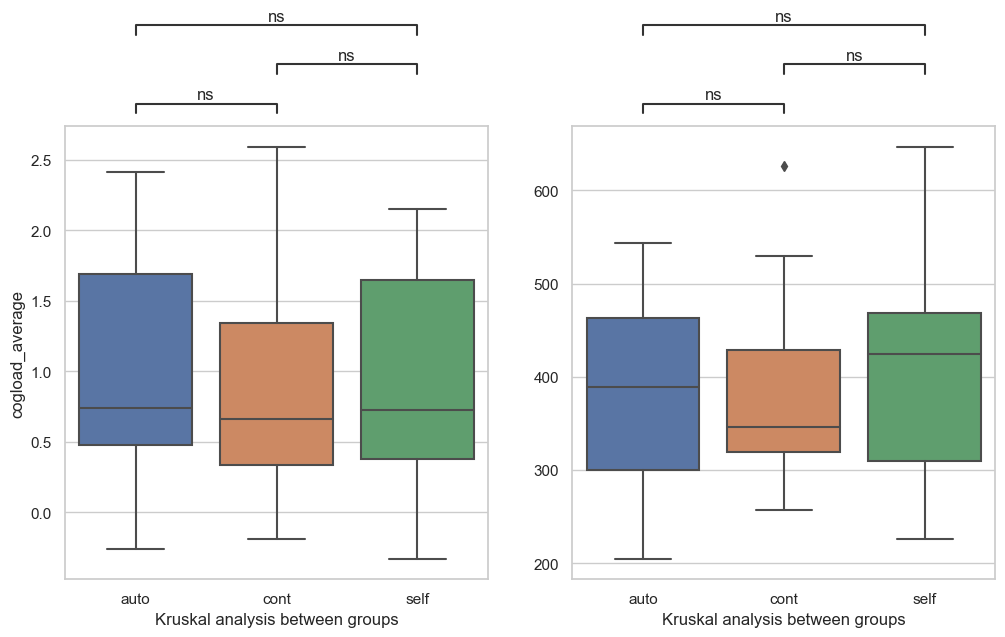

In [205]:
### pair analysis visualization 
sns.set(style = 'whitegrid')
x = 'condition'
y = 'cogload_average'
order = ["auto", "cont","self"]
method = 'Kruskal'

fig, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)

if 1:
   axes[0] = sns.boxplot(ax = axes[0], data=data_analysis, x=x, y=y, order=order)
   test_results = add_stat_annotation(ax=axes[0], data=data_analysis, x=x, y=y, order=order,
                                    box_pairs=[
                                             (order[0], order[1]),
                                             (order[0], order[2]),
                                             (order[1], order[2]),
                                               ],
                                    test=method, 
                                    comparisons_correction=None, 
                                    text_format='star', loc='outside', verbose=1,
                                    )

   axes[0].set(xlabel = method + ' analysis between groups', ylabel=y)

if 1:
   y = "time_all"
   axes[1] = sns.boxplot(ax = axes[1],data=data_analysis, x=x, y=y,order=order,)
   test_results = add_stat_annotation(ax=axes[1], data=data_analysis, x=x, y=y,
                                    box_pairs=[
                                             (order[0], order[1]),
                                             (order[0], order[2]),
                                             (order[1], order[2]),
                                             ],
                                    test=method, 
                                    comparisons_correction=None, 
                                    text_format='star', loc='outside', verbose=1,
                                    )
   axes[1].set(xlabel = method + ' analysis between groups', ylabel='')

In [208]:
### sample from raw data 
rate = 20
data_image = copy.deepcopy(data_auto[1])
subset = data_image[::rate]
## 3D Stastic ###
if 1:
    df = subset
    fig = px.scatter_3d(df, x='CameraPosX', y='CameraPosY', z='CameraPosZ',
                color='Trend_Sum',color_continuous_scale=px.colors.sequential.Viridis,symbol='light_state',symbol_sequence=["cross","circle"],opacity=0.8,)
    fig.update_traces(marker_size = 3)
    fig.show()

In [220]:
# TEST UI CHANGE #
i = 1
data_light = copy.deepcopy(data_auto[i])
data_light["state_change"] = data_light["light_state"].diff()
column_changes = data_light[data_light['state_change'] != 0]
UI_dark_list = column_changes["light_state"][column_changes["light_state"]==False].index
window = 500
cog_before = []
cog_after = []
for i in range(len(UI_dark_list)):
    cog_before.append(np.average(data_light["Trend_Sum"][UI_dark_list[i]-window:UI_dark_list[i]]))
    cog_after.append(np.average(data_light["Trend_Sum"][UI_dark_list[i]:UI_dark_list[i]+window]))
print(cog_before)
print(cog_after)

[1.1703844834, 1.1493368282, 1.1814254228, 0.9317546062, 0.9448417047999997, 1.108159962, 0.8812486236]
[1.0086858928000002, 0.8388293776000001, 1.0109514327999998, 0.8907129792, 1.3740564134, 1.2647457568000002, 1.0122407266]


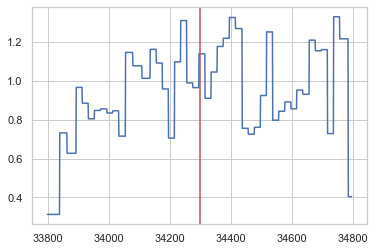

In [226]:
i = 6
plt.plot(data_light["Trend_Sum"][UI_dark_list[i]-window:UI_dark_list[i]+window])
plt.axvline(x=UI_dark_list[i],c="r")
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Before_UI_dark v.s. After_UI_dark: Kruskal-Wallis paired samples, P_val=6.534e-06 stat=2.033e+01


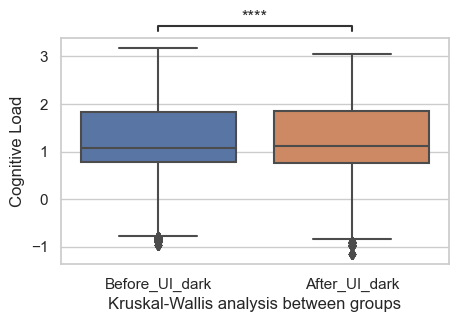

In [255]:
control_df = pd.DataFrame()
test_df = pd.DataFrame()
for i in range(len(data_auto)):
   data_light = copy.deepcopy(data_auto[i])
   data_light["state_change"] = data_light["light_state"].diff()
   column_changes = data_light[data_light['state_change'] != 0]
   UI_dark_list = column_changes["light_state"][column_changes["light_state"]==False].index
   window = 500
   for j in range(len(UI_dark_list)):
      control_df = control_df.append(pd.DataFrame(data_auto[i]["Trend_Sum"][UI_dark_list[j]-window:UI_dark_list[j]].values,columns=["Trend_Sum"]))
      test_df = test_df.append(pd.DataFrame(data_auto[i]["Trend_Sum"][UI_dark_list[j]:UI_dark_list[j]+window].values,columns=["Trend_Sum"]))

# control_df = pd.DataFrame(data_light["Trend_Sum"][UI_dark_list[i]-window:UI_dark_list[i]])
# test_df = pd.DataFrame(data_light["Trend_Sum"][UI_dark_list[i]:UI_dark_list[i]+window])
group_1 = "Before_UI_dark"
group_2 = "After_UI_dark"

control_df["Groups"] = group_1
test_df["Groups"] = group_2

combine_df = pd.concat([control_df,test_df])
combine_df.columns = ["CogLoad","Groups"]


data = combine_df
x = 'Groups'
y = 'CogLoad'
hue = 'Groups'
order = [group_1, group_2]

sns.set(style = 'whitegrid')
fig, axes = plt.subplots(1,1, figsize=(5,3), dpi=100)

if 1:
   axes = sns.boxplot(ax = axes, data=data, x=x, y=y, order=order)
   test_results = add_stat_annotation(ax=axes, data=data, x=x, y=y, order=order,
                                    box_pairs=[(order[0], order[1])],
                                    test='Kruskal', 
                                    # test='Wilcoxon', 
                                    comparisons_correction=None, 
                                    text_format='star', loc='outside', verbose=2,
                                    #   stats_params={'alternative': 'greater'}
                                    )
   # axes.set(xlabel='Paired analysis between conditions (Greater)', ylabel='VRSQ score')
   axes.set(xlabel='Kruskal-Wallis analysis between groups', ylabel='Cognitive Load')
   # axes.set(xlabel='Wilcoxon analysis between groups', ylabel='Mission time (s)')
   # axes.set(xlabel='Wilcoxon analysis between groups', ylabel='Average cognitive load')

In [257]:
np.mean(test_df)

Trend_Sum    1.248909
dtype: float64